In [1]:
from RutishauserLabtoNWB import helper, single_neuron
from pynwb import NWBHDF5IO
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import clusterdata as cd
import phate
import scipy
import sklearn

# Creating the Data Matrix and Predictions

In [2]:
def make_firing_matrix(neurons):
    num_categories = 5
    mat = np.empty((len(neurons), 2*num_categories))
    stat_type = np.empty(len(neurons))  # 0: none, 1: vs, 2: ms, 3: vs and ms
    for i in range(len(neurons)):
        trial_type = [neurons[i].trials_learn, neurons[i].trials_recog]
        for j in range(2):
            for k in range(num_categories):
                spike_rate_sum = 0
                for trial in trial_type[j][(k*20):((k+1)*20)]:
                    spike_rate_sum += (trial.win_spike_rate(neurons[i].spike_timestamps, 1000, 2000)
                                       -trial.win_spike_rate(neurons[i].spike_timestamps, 0, 1000)) # rel baseline
                mat[i, 5*j+k] = spike_rate_sum
        neuron_type = 0
        if neurons[i].vs_test() < 0.05:
            neuron_type += 1
        if neurons[i].ms_test(1000) < 0.05:
            neuron_type += 2
        stat_type[i] = neuron_type
    return mat, stat_type

In [2]:
# this pulls the time courses (similar to the PSTH at the v bottom of this notebook)
def make_timecourse_matrix(neurons):
    num_categories = 5; x_range = 2500; bin_size = 250; n_x = int(x_range/bin_size)
    mat = np.empty((len(neurons), 2*num_categories, n_x))
    stat_type = np.empty(len(neurons))  # 0: none, 1: vs, 2: ms, 3: vs and ms
    for i in range(len(neurons)): # each neuron
        trial_type = [neurons[i].trials_learn, neurons[i].trials_recog]
        for j in range(2): # learn or recog
            for k in range(num_categories): # type of stim
                spike_rate = np.zeros(n_x)
                for m in range(n_x): # time bin
                    mean_rate = 0; start = m*bin_size; end = (m+1)*bin_size;
                    for trial in trial_type[j][(k*20):((k+1)*20)]:
                        mean_rate += trial.win_spike_rate(neurons[i].spike_timestamps, start-1000, end-1000)
                    spike_rate[m] = mean_rate / 20
                mat[i, 5*j+k,:] = spike_rate
        neuron_type = 0
        if neurons[i].vs_test() < 0.05:
            neuron_type += 1
        if neurons[i].ms_test(1000) < 0.05:
            neuron_type += 2
        stat_type[i] = neuron_type
    return mat

In [3]:
# timecourses = None
data_matrix_sub = None
predictions = None

for filename in os.listdir('NWBData'):
    file = NWBHDF5IO('NWBData/{}'.format(filename), mode='r').read()
    neurons = single_neuron.extract_neuron_data_from_nwb(file)
    if data_matrix_sub is None:
        data_matrix_sub, predictions = make_firing_matrix(neurons)
#         timecourses = make_timecourse_matrix(neurons) # again not sure if this will work
    else:
        mat, pred = make_firing_matrix(neurons)
        data_matrix_sub = np.append(data_matrix_sub, mat, axis=0)
        predictions = np.append(predictions, pred, axis=0)
#         timecourses = np.append(timecourses, make_timecourse_matrix(neurons), axis=0)
    if data_matrix_sub.shape[0] >= 2000:
        break

Session_id:  H10_7
Channel:  1
Cell_id:  0
Number of spikes: 1809
Session_id:  H10_7
Channel:  2
Cell_id:  1
Number of spikes: 2057
Session_id:  H10_7
Channel:  2
Cell_id:  1
Number of spikes: 4298
Session_id:  H10_7
Channel:  3
Cell_id:  2
Number of spikes: 1188
Session_id:  H10_7
Channel:  3
Cell_id:  2
Number of spikes: 8091
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 2107
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 1009
Session_id:  H10_7
Channel:  4
Cell_id:  3
Number of spikes: 1869
Session_id:  H10_7
Channel:  5
Cell_id:  4
Number of spikes: 684
Session_id:  H10_7
Channel:  5
Cell_id:  4
Number of spikes: 2176
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 194
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 460
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 1719
Session_id:  H10_7
Channel:  6
Cell_id:  5
Number of spikes: 1230
Session_id:  H10_7
Channel:  8
Cell_id:  6
Number of spikes: 1935
Session_id:  

Session_id:  H14_18
Channel:  1
Cell_id:  0
Number of spikes: 1467
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 561
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 908
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 3161
Session_id:  H14_18
Channel:  3
Cell_id:  1
Number of spikes: 5061
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 873
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 782
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2474
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2024
Session_id:  H14_18
Channel:  4
Cell_id:  2
Number of spikes: 2789
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 953
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 490
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 2779
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 411
Session_id:  H14_18
Channel:  5
Cell_id:  3
Number of spikes: 221
Ses

Session_id:  H16_24
Channel:  10
Cell_id:  0
Number of spikes: 5478
Session_id:  H16_24
Channel:  10
Cell_id:  0
Number of spikes: 4886
Session_id:  H16_24
Channel:  11
Cell_id:  1
Number of spikes: 380
Session_id:  H16_24
Channel:  11
Cell_id:  1
Number of spikes: 5110
Session_id:  H16_24
Channel:  13
Cell_id:  2
Number of spikes: 3990
Session_id:  H16_24
Channel:  14
Cell_id:  3
Number of spikes: 8506
Session_id:  H16_24
Channel:  19
Cell_id:  4
Number of spikes: 7030
Session_id:  H16_24
Channel:  22
Cell_id:  5
Number of spikes: 2465
Session_id:  H16_24
Channel:  23
Cell_id:  6
Number of spikes: 2835
Session_id:  H16_24
Channel:  25
Cell_id:  7
Number of spikes: 21553
Session_id:  H16_24
Channel:  26
Cell_id:  8
Number of spikes: 2295
Session_id:  H16_24
Channel:  27
Cell_id:  9
Number of spikes: 6038
Session_id:  H16_24
Channel:  30
Cell_id:  10
Number of spikes: 25820
Session_id:  H16_24
Channel:  31
Cell_id:  11
Number of spikes: 22906
Session_id:  H16_24
Channel:  42
Cell_id:  1

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 465
Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 914
Session_id:  H19_27
Channel:  15
Cell_id:  0
Number of spikes: 6797
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 776
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 5011
Session_id:  H19_27
Channel:  26
Cell_id:  1
Number of spikes: 778
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 1224
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 576
Session_id:  H19_27
Channel:  28
Cell_id:  2
Number of spikes: 994
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 82
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 1535
Session_id:  H19_27
Channel:  29
Cell_id:  3
Number of spikes: 692
Session_id:  H19_27
Channel:  30
Cell_id:  4
Number of spikes: 2308
Session_id:  H19_27
Channel:  31
Cell_id:  5
Number of spikes: 647
Session_id:  H19_27
Channel:  31
Cell_id:  5
Number of spi

Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 4146
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 1697
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 268
Session_id:  H23_43
Channel:  2
Cell_id:  0
Number of spikes: 10489
Session_id:  H23_43
Channel:  3
Cell_id:  1
Number of spikes: 8907
Session_id:  H23_43
Channel:  3
Cell_id:  1
Number of spikes: 9605
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 417
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 5927
Session_id:  H23_43
Channel:  4
Cell_id:  2
Number of spikes: 3353
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 375
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 1350
Session_id:  H23_43
Channel:  5
Cell_id:  3
Number of spikes: 9273
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 332
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 478
Session_id:  H23_43
Channel:  6
Cell_id:  4
Number of spikes: 5389

Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 1205
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 353
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 174
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 332
Session_id:  CS24_60
Channel:  9
Cell_id:  0
Number of spikes: 186
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 240
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 262
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 182
Session_id:  CS24_60
Channel:  10
Cell_id:  1
Number of spikes: 559
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 281
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 357
Session_id:  CS24_60
Channel:  14
Cell_id:  2
Number of spikes: 493
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number of spikes: 696
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number of spikes: 166
Session_id:  CS24_60
Channel:  16
Cell_id:  3
Number

Session_id:  CS26_66
Channel:  49
Cell_id:  0
Number of spikes: 441
Session_id:  CS26_66
Channel:  51
Cell_id:  1
Number of spikes: 1534
Session_id:  CS26_66
Channel:  51
Cell_id:  1
Number of spikes: 1176
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 930
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 256
Session_id:  CS26_66
Channel:  52
Cell_id:  2
Number of spikes: 54
Session_id:  CS26_66
Channel:  53
Cell_id:  3
Number of spikes: 725
Session_id:  CS26_66
Channel:  53
Cell_id:  3
Number of spikes: 209
Session_id:  CS26_66
Channel:  55
Cell_id:  4
Number of spikes: 485
Session_id:  CS26_66
Channel:  55
Cell_id:  4
Number of spikes: 2275
Session_id:  CS26_66
Channel:  56
Cell_id:  5
Number of spikes: 298
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1607
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1752
Session_id:  CS27_67
Channel:  1
Cell_id:  0
Number of spikes: 1140
Session_id:  CS27_67
Channel:  2
Cell_id:  1
N

Session_id:  H28_48
Channel:  1
Cell_id:  0
Number of spikes: 12433
Session_id:  H28_48
Channel:  2
Cell_id:  1
Number of spikes: 1362
Session_id:  H28_48
Channel:  2
Cell_id:  1
Number of spikes: 8034
Session_id:  H28_48
Channel:  3
Cell_id:  2
Number of spikes: 1166
Session_id:  H28_48
Channel:  3
Cell_id:  2
Number of spikes: 2379
Session_id:  H28_48
Channel:  5
Cell_id:  3
Number of spikes: 3990
Session_id:  H28_48
Channel:  6
Cell_id:  4
Number of spikes: 8742
Session_id:  H28_48
Channel:  7
Cell_id:  5
Number of spikes: 8203
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 91
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 889
Session_id:  H28_48
Channel:  25
Cell_id:  6
Number of spikes: 2590
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 827
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 2917
Session_id:  H28_48
Channel:  26
Cell_id:  7
Number of spikes: 9367
Session_id:  H28_48
Channel:  27
Cell_id:  8
Number of spik

Session_id:  CS29_69
Channel:  48
Cell_id:  16
Number of spikes: 9494
Session_id:  CS29_70
Channel:  9
Cell_id:  0
Number of spikes: 1359
Session_id:  CS29_70
Channel:  10
Cell_id:  1
Number of spikes: 591
Session_id:  CS29_70
Channel:  25
Cell_id:  2
Number of spikes: 74
Session_id:  CS29_70
Channel:  25
Cell_id:  2
Number of spikes: 238
Session_id:  CS29_70
Channel:  25
Cell_id:  2
Number of spikes: 176
Session_id:  CS29_70
Channel:  25
Cell_id:  2
Number of spikes: 89
Session_id:  CS29_70
Channel:  26
Cell_id:  3
Number of spikes: 251
Session_id:  CS29_70
Channel:  26
Cell_id:  3
Number of spikes: 1362
Session_id:  CS29_70
Channel:  28
Cell_id:  4
Number of spikes: 554
Session_id:  CS29_70
Channel:  29
Cell_id:  5
Number of spikes: 341
Session_id:  CS29_70
Channel:  29
Cell_id:  5
Number of spikes: 175
Session_id:  CS29_70
Channel:  29
Cell_id:  5
Number of spikes: 1791
Session_id:  CS29_70
Channel:  33
Cell_id:  6
Number of spikes: 2310
Session_id:  CS29_70
Channel:  33
Cell_id:  6

Session_id:  CS32_74
Channel:  25
Cell_id:  0
Number of spikes: 199
Session_id:  CS32_74
Channel:  25
Cell_id:  0
Number of spikes: 193
Session_id:  CS32_74
Channel:  25
Cell_id:  0
Number of spikes: 5148
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 104
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 210
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 371
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 315
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 1825
Session_id:  CS32_74
Channel:  26
Cell_id:  1
Number of spikes: 674
Session_id:  CS32_74
Channel:  27
Cell_id:  2
Number of spikes: 1677
Session_id:  CS32_74
Channel:  27
Cell_id:  2
Number of spikes: 381
Session_id:  CS32_74
Channel:  27
Cell_id:  2
Number of spikes: 1700
Session_id:  CS32_74
Channel:  28
Cell_id:  3
Number of spikes: 96
Session_id:  CS32_74
Channel:  28
Cell_id:  3
Number of spikes: 190
Session_id:  CS32_74
Channel:  28
Cell_id:  3

Session_id:  CS33_77
Channel:  20
Cell_id:  0
Number of spikes: 264
Session_id:  CS33_77
Channel:  20
Cell_id:  0
Number of spikes: 218
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 1827
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 3240
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 253
Session_id:  CS33_77
Channel:  33
Cell_id:  1
Number of spikes: 2633
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 397
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 114
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 943
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 7606
Session_id:  CS33_77
Channel:  34
Cell_id:  2
Number of spikes: 2019
Session_id:  CS33_77
Channel:  36
Cell_id:  3
Number of spikes: 516
Session_id:  CS33_77
Channel:  36
Cell_id:  3
Number of spikes: 506
Session_id:  CS33_77
Channel:  36
Cell_id:  3
Number of spikes: 65
Session_id:  CS33_77
Channel:  36
Cell_id:  

Session_id:  CS38_102
Channel:  3
Cell_id:  0
Number of spikes: 1805
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 734
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 4431
Session_id:  CS38_102
Channel:  9
Cell_id:  1
Number of spikes: 7303
Session_id:  CS38_102
Channel:  33
Cell_id:  2
Number of spikes: 2909
Session_id:  CS38_102
Channel:  33
Cell_id:  2
Number of spikes: 4228
Session_id:  CS38_102
Channel:  34
Cell_id:  3
Number of spikes: 5656
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 872
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 3281
Session_id:  CS38_102
Channel:  35
Cell_id:  4
Number of spikes: 661
Session_id:  CS38_102
Channel:  36
Cell_id:  5
Number of spikes: 1813
Session_id:  CS38_102
Channel:  37
Cell_id:  6
Number of spikes: 2340
Session_id:  CS38_102
Channel:  37
Cell_id:  6
Number of spikes: 2861
Session_id:  CS38_102
Channel:  38
Cell_id:  7
Number of spikes: 2609
Session_id:  CS38_102
Chann

Session_id:  CS39_93
Channel:  26
Cell_id:  0
Number of spikes: 583
Session_id:  CS39_93
Channel:  26
Cell_id:  0
Number of spikes: 873
Session_id:  CS39_93
Channel:  27
Cell_id:  1
Number of spikes: 2536
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 202
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 395
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 2188
Session_id:  CS39_93
Channel:  31
Cell_id:  2
Number of spikes: 558
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 2170
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 703
Session_id:  CS39_93
Channel:  32
Cell_id:  3
Number of spikes: 612
Session_id:  CS39_93
Channel:  49
Cell_id:  4
Number of spikes: 1209
Session_id:  CS39_93
Channel:  50
Cell_id:  5
Number of spikes: 10096
Session_id:  CS39_93
Channel:  51
Cell_id:  6
Number of spikes: 4654
Session_id:  CS39_93
Channel:  51
Cell_id:  6
Number of spikes: 1145
Session_id:  CS39_93
Channel:  51
Cell_i

Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 620
Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 2672
Session_id:  H42_54
Channel:  10
Cell_id:  0
Number of spikes: 1031
Session_id:  H42_54
Channel:  15
Cell_id:  1
Number of spikes: 2963
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 228
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 355
Session_id:  H42_54
Channel:  17
Cell_id:  2
Number of spikes: 5527
Session_id:  H42_54
Channel:  18
Cell_id:  3
Number of spikes: 18577
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 94
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 456
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 182
Session_id:  H42_54
Channel:  20
Cell_id:  4
Number of spikes: 621
Session_id:  H42_54
Channel:  21
Cell_id:  5
Number of spikes: 11183
Session_id:  H42_54
Channel:  26
Cell_id:  6
Number of spikes: 1101
Session_id:  H42_54
Channel:  30
Cell_id:  7
Number of

Session_id:  H43_56
Channel:  9
Cell_id:  0
Number of spikes: 185
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 1048
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 903
Session_id:  H43_56
Channel:  10
Cell_id:  1
Number of spikes: 132
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 1111
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 1110
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 462
Session_id:  H43_56
Channel:  11
Cell_id:  2
Number of spikes: 783
Session_id:  H43_56
Channel:  13
Cell_id:  3
Number of spikes: 493
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 1853
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 1819
Session_id:  H43_56
Channel:  14
Cell_id:  4
Number of spikes: 927
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spikes: 152
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spikes: 558
Session_id:  H43_56
Channel:  15
Cell_id:  5
Number of spi

Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 429
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 1007
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 544
Session_id:  H47_92
Channel:  9
Cell_id:  0
Number of spikes: 800
Session_id:  H47_92
Channel:  15
Cell_id:  1
Number of spikes: 3779
Session_id:  H47_92
Channel:  18
Cell_id:  2
Number of spikes: 507
Session_id:  H47_92
Channel:  18
Cell_id:  2
Number of spikes: 1174
Session_id:  H47_97
Channel:  3
Cell_id:  0
Number of spikes: 3216
Session_id:  H47_97
Channel:  4
Cell_id:  1
Number of spikes: 1420
Session_id:  H47_97
Channel:  4
Cell_id:  1
Number of spikes: 1189
Session_id:  H47_97
Channel:  5
Cell_id:  2
Number of spikes: 2404
Session_id:  H47_97
Channel:  6
Cell_id:  3
Number of spikes: 6206
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 4057
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 3586
Session_id:  H47_97
Channel:  9
Cell_id:  4
Number of spikes: 1

Session_id:  CS49_117
Channel:  52
Cell_id:  0
Number of spikes: 882
Session_id:  CS49_117
Channel:  54
Cell_id:  1
Number of spikes: 131
Session_id:  CS49_117
Channel:  57
Cell_id:  2
Number of spikes: 1869
Session_id:  CS49_117
Channel:  58
Cell_id:  3
Number of spikes: 1438
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 109
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 903
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 919
Session_id:  CS49_117
Channel:  61
Cell_id:  4
Number of spikes: 5375
Session_id:  CS49_117
Channel:  62
Cell_id:  5
Number of spikes: 745
Session_id:  CS49_117
Channel:  64
Cell_id:  6
Number of spikes: 128
Session_id:  CS49_117
Channel:  64
Cell_id:  6
Number of spikes: 2098
Session_id:  CS49_118
Channel:  49
Cell_id:  0
Number of spikes: 373
Session_id:  CS49_118
Channel:  50
Cell_id:  1
Number of spikes: 370
Session_id:  CS49_118
Channel:  52
Cell_id:  2
Number of spikes: 281
Session_id:  CS49_118
Channel:

Session_id:  H51_105
Channel:  14
Cell_id:  0
Number of spikes: 564
Session_id:  H51_105
Channel:  14
Cell_id:  0
Number of spikes: 1262
Session_id:  H51_105
Channel:  26
Cell_id:  1
Number of spikes: 2138
Session_id:  H51_105
Channel:  27
Cell_id:  2
Number of spikes: 306
Session_id:  H51_105
Channel:  27
Cell_id:  2
Number of spikes: 4134
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 386
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 295
Session_id:  H51_105
Channel:  28
Cell_id:  3
Number of spikes: 1773
Session_id:  H51_105
Channel:  29
Cell_id:  4
Number of spikes: 859
Session_id:  H51_105
Channel:  32
Cell_id:  5
Number of spikes: 3035
Session_id:  H51_105
Channel:  41
Cell_id:  6
Number of spikes: 1077
Session_id:  H51_105
Channel:  41
Cell_id:  6
Number of spikes: 3014
Session_id:  H51_105
Channel:  42
Cell_id:  7
Number of spikes: 1801
Session_id:  H51_105
Channel:  42
Cell_id:  7
Number of spikes: 1314
Session_id:  H51_105
Channel:  42
Cell_

Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 3017
Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 1429
Session_id:  CS54_124
Channel:  17
Cell_id:  0
Number of spikes: 4511
Session_id:  CS54_124
Channel:  18
Cell_id:  1
Number of spikes: 3341
Session_id:  CS54_124
Channel:  18
Cell_id:  1
Number of spikes: 2388
Session_id:  CS54_124
Channel:  19
Cell_id:  2
Number of spikes: 1147
Session_id:  CS54_124
Channel:  19
Cell_id:  2
Number of spikes: 2477
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 1015
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 8561
Session_id:  CS54_124
Channel:  20
Cell_id:  3
Number of spikes: 3690
Session_id:  CS54_124
Channel:  22
Cell_id:  4
Number of spikes: 908
Session_id:  CS54_124
Channel:  22
Cell_id:  4
Number of spikes: 2743
Session_id:  CS54_124
Channel:  23
Cell_id:  5
Number of spikes: 1009
Session_id:  CS54_124
Channel:  23
Cell_id:  5
Number of spikes: 2685
Session_id:  CS54_124

Session_id:  CS54_126
Channel:  17
Cell_id:  0
Number of spikes: 827
Session_id:  CS54_126
Channel:  17
Cell_id:  0
Number of spikes: 1203
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 1777
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 3048
Session_id:  CS54_126
Channel:  18
Cell_id:  1
Number of spikes: 569
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 3864
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 5530
Session_id:  CS54_126
Channel:  19
Cell_id:  2
Number of spikes: 2018
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 1948
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 241
Session_id:  CS54_126
Channel:  20
Cell_id:  3
Number of spikes: 4244
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 522
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 926
Session_id:  CS54_126
Channel:  21
Cell_id:  4
Number of spikes: 631
Session_id:  CS54_126
Chan

Session_id:  CS58_132
Channel:  146
Cell_id:  0
Number of spikes: 1037
Session_id:  CS58_132
Channel:  148
Cell_id:  1
Number of spikes: 1365
Session_id:  CS58_132
Channel:  149
Cell_id:  2
Number of spikes: 2324
Session_id:  CS58_132
Channel:  150
Cell_id:  3
Number of spikes: 3589
Session_id:  CS58_132
Channel:  177
Cell_id:  4
Number of spikes: 722
Session_id:  CS58_132
Channel:  181
Cell_id:  5
Number of spikes: 5699
Session_id:  CS58_132
Channel:  182
Cell_id:  6
Number of spikes: 937
Session_id:  CS58_132
Channel:  183
Cell_id:  7
Number of spikes: 749
Session_id:  CS58_133
Channel:  150
Cell_id:  0
Number of spikes: 3643
Session_id:  CS58_133
Channel:  151
Cell_id:  1
Number of spikes: 1134
Session_id:  CS60_134
Channel:  177
Cell_id:  0
Number of spikes: 1330
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 833
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 711
Session_id:  CS60_134
Channel:  178
Cell_id:  1
Number of spikes: 1619
Session_id:

Session_id:  H09_6
Channel:  2
Cell_id:  0
Number of spikes: 1180
Session_id:  H09_6
Channel:  3
Cell_id:  1
Number of spikes: 880
Session_id:  H09_6
Channel:  4
Cell_id:  2
Number of spikes: 2943
Session_id:  H09_6
Channel:  5
Cell_id:  3
Number of spikes: 2916
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 629
Session_id:  H09_6
Channel:  6
Cell_id:  4
Number of spikes: 1745
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1066
Session_id:  H09_6
Channel:  8
Cell_id:  5
Number of spikes: 1010
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 1652
Session_id:  H09_6
Channel:  18
Cell_id:  6
Number of spikes: 2017
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1216
Session_id:  H09_6
Channel:  19
Cell_id:  7
Number of spikes: 1883
Session_id:  H09_6
Channel:  20
Cell_id:  8
Number of spikes: 1642
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 811
Session_id:  H09_6
Channel:  21
Cell_id:  9
Number of spikes: 2157
Sessio

Session_id:  T100_2008
Channel:  208
Cell_id:  0
Number of spikes: 1514
Session_id:  T101_2011
Channel:  131
Cell_id:  0
Number of spikes: 1425
Session_id:  T101_2011
Channel:  132
Cell_id:  1
Number of spikes: 1098
Session_id:  T101_2011
Channel:  133
Cell_id:  2
Number of spikes: 1687
Session_id:  T101_2011
Channel:  134
Cell_id:  3
Number of spikes: 3020
Session_id:  T101_2011
Channel:  135
Cell_id:  4
Number of spikes: 1622
Session_id:  T101_2011
Channel:  136
Cell_id:  5
Number of spikes: 1002
Session_id:  T101_2011
Channel:  196
Cell_id:  6
Number of spikes: 1512
Session_id:  T101_2011
Channel:  198
Cell_id:  7
Number of spikes: 699
Session_id:  T103_2009
Channel:  137
Cell_id:  0
Number of spikes: 1322
Session_id:  T103_2009
Channel:  140
Cell_id:  1
Number of spikes: 1963
Session_id:  T103_2009
Channel:  140
Cell_id:  1
Number of spikes: 1661
Session_id:  T107_2007
Channel:  155
Cell_id:  0
Number of spikes: 1414
Session_id:  T107_2007
Channel:  157
Cell_id:  1
Number of spikes

In [5]:
print(data_matrix_sub.shape)
print(predictions.shape)
# print(timecourses.shape)

(1864, 10)
(1864,)


In [6]:
data_matrix_sub

array([[  -1.,    6.,    0., ...,   -5.,    1.,   -1.],
       [ -13.,   -4.,  -10., ...,  -10.,  -13.,    1.],
       [   7.,    6.,   12., ...,    6.,   12.,   -5.],
       ...,
       [ -10.,    3.,   -3., ...,   13.,    0.,  -11.],
       [  -9.,    6.,    9., ...,  -25.,  -23.,  -39.],
       [ -18.,   10.,   11., ...,  -86.,  -94., -109.]])

In [7]:
np.savez_compressed('neuron_firing_matrix_diff', data_matrix_sub)

In [7]:
np.savez_compressed('neuron_firing_matrix', data_matrix)
np.savez_compressed('neuron_predicted_labels', predictions)
np.savez_compressed('timecourse_matrix', timecourses)

# Initial Exploration of Dimensionality Reduction Methods

In [1]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import clusterdata as cd
import phate
import scipy
import sklearn

In [2]:
def visualize_by_label(data_matrix, predictions, limits):
    x1, x2, y1, y2 = limits
    fig, ax = plt.subplots(1, 5, figsize=(20,5))
    data_phate = phate.PHATE(verbose=0).fit_transform(data_matrix)
    for i in range(5):
        if i == 0:
            ax[0].scatter(data_phate[:,0],data_phate[:,1],c=predictions)
            ax[0].set_title('All Together')
        else:
            ind = [a for a in range(len(predictions)) if predictions[a]==i-1]
            ax[i].scatter(data_phate[ind,0], data_phate[ind,1])
            ax[i].set_title('Label: {}'.format(i-1))
        ax[i].set_xlim(x1, x2)
        ax[i].set_ylim(y1, y2)
    plt.show()

In [3]:
# load the files
data_matrix = np.load('neuron_firing_matrix.npz')['arr_0']
data_matrix = np.delete(data_matrix, 688, axis=0)
data_matrix_diff = np.load('neuron_firing_matrix_diff.npz')['arr_0']
data_matrix_diff = np.delete(data_matrix_diff, 688, axis=0)
data_matrix_diff = np.where(data_matrix_diff < 0, 0, data_matrix_diff)  # only for the difference one, may need to filter out 0s later
predictions = np.load('neuron_predicted_labels.npz')['arr_0']
predictions = np.delete(predictions, 688)
timecourses = np.load('timecourse_matrix.npz')['arr_0']
timecourses = np.delete(timecourses, 688, axis=0)
print(data_matrix.shape)  # should be (1864, 10)
print(data_matrix_diff.shape)
print(predictions.shape)  # should be (1864,)
print(timecourses.shape)  # should be (1864, 10, 10)

(1863, 10)
(1863, 10)
(1863,)
(1863, 10, 10)


In [38]:
data_matrix

array([[ 12.,  12.,  19., ...,  12.,   9.,   6.],
       [ 11.,   4.,  12., ...,   7.,   6.,   3.],
       [ 81., 157., 122., ..., 137., 131.,  89.],
       ...,
       [  8.,   9.,  34., ...,  30.,  42.,  18.],
       [  7.,  13.,  51., ...,  77.,  80., 101.],
       [ 21.,  14., 178., ..., 330., 289., 315.]])

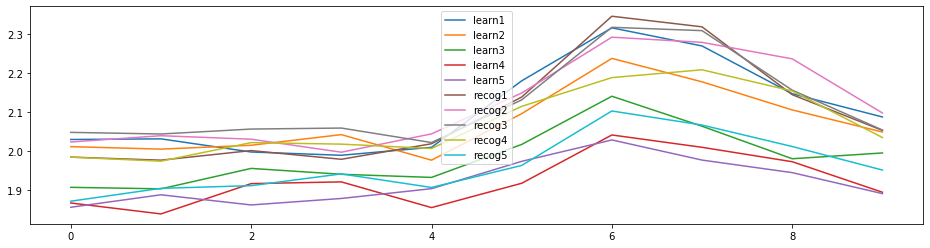

In [5]:
# plotting the mean timecourse for all cells in the 10 categories we have
ft_labels = ['learn1','learn2','learn3','learn4','learn5','recog1','recog2','recog3','recog4','recog5']
plt.figure(figsize=(16,4))
for i in range(10):
    plt.plot(np.mean(timecourses,axis=0)[i,:])
plt.legend(ft_labels)
plt.show()

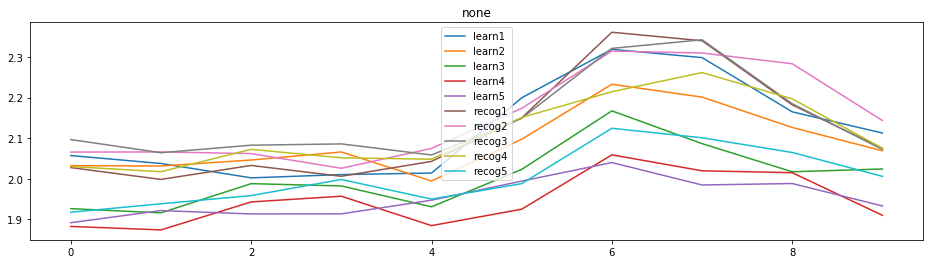

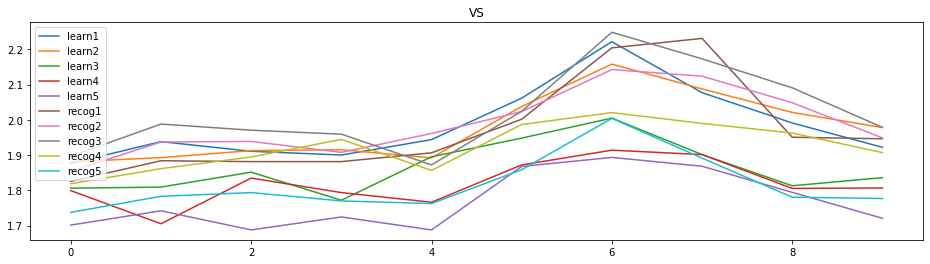

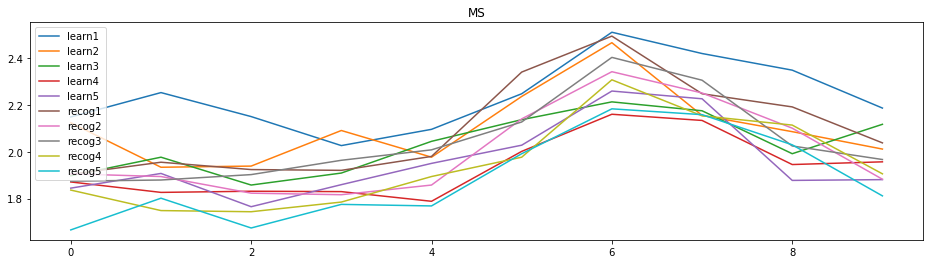

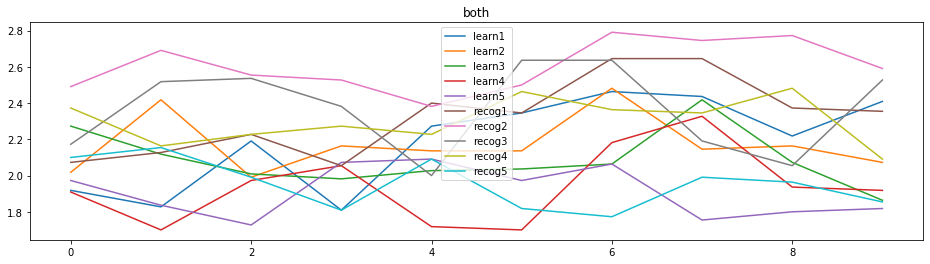

In [6]:
# plotting the mean timecourse for dif cell types in the 10 categories we have
cell_types = ['none','VS','MS','both']
ft_labels = ['learn1','learn2','learn3','learn4','learn5','recog1','recog2','recog3','recog4','recog5']
for j in range(len(cell_types)):
    plt.figure(figsize=(16,4))
    for i in range(10):
        plt.plot(np.mean(timecourses[predictions==j,:,:],axis=0)[i,:]) # collapsing the cells
    plt.legend(ft_labels)
    plt.title(cell_types[j])
    plt.show()

In [46]:
# z-score, PCA, and then PHATE
from sklearn.decomposition import PCA
for i in range(10): # for each timecourse type
    timecourses[:,i,:] /= np.sum(timecourses[:,i,:],axis=0) # z-score each timecourse --> change row-norm
    tc_recon = PCA(n_components=1).fit_transform(tc_z)
    if i==0: 
        frtc_recon = tc_recon
    else:
        frtc_recon = np.append(frtc_recon,tc_recon,axis=1)


In [47]:
tc_z.shape

(1864, 10)

In [48]:
frtc_recon.shape

(1864, 10)

In [48]:
# this doesn't really do much, don't have to run
dif = data_matrix[:,0:5] - data_matrix[:,5:10]
data_matrix = np.append(data_matrix,dif,axis=1)
data_matrix

array([[-0.41106333, -0.59878791,  1.62736993, ...,  0.92409719,
         0.76441152, -0.65692399],
       [ 0.65751011, -1.31106998,  0.9792265 , ..., -0.29750804,
        -0.01224155, -1.34036088],
       [-1.53641673,  1.52634063,  0.2914785 , ..., -0.98622189,
        -1.48429119,  1.36530481],
       ...,
       [-0.75897398, -0.75311861,  0.62322433, ...,  1.16827532,
        -1.3738271 ,  3.13900903],
       [-0.90672513, -0.71576933,  0.78531569, ...,  1.16685412,
        -0.60740976,  0.20887408],
       [-0.7720008 , -0.83556996,  0.6438416 , ..., -0.41157869,
        -0.51112005,  0.7414508 ]])

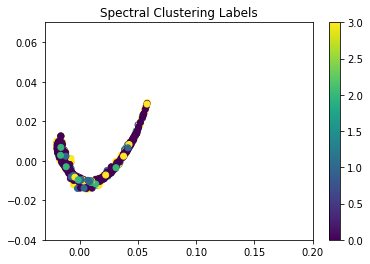

In [39]:
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.xlim(-0.03, 0.2)
plt.ylim(-0.04, 0.07)
plt.colorbar()

/opt/anaconda3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 122 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


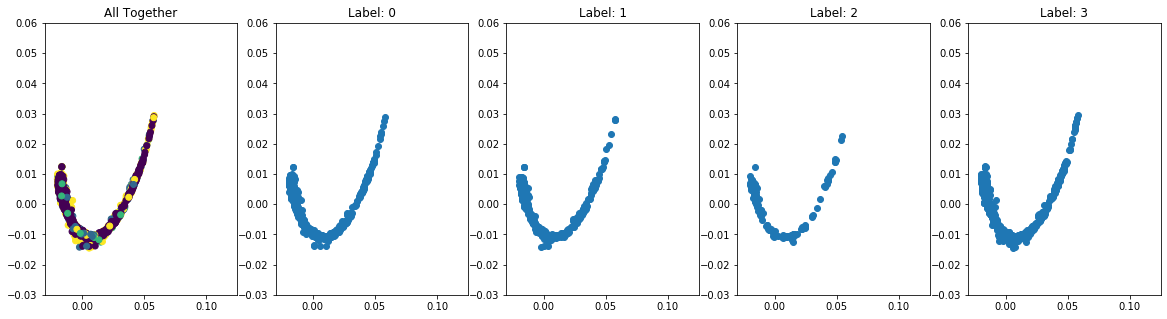

In [56]:
visualize_by_label(tmp, labels_SC, [-0.03, 0.125, -0.03, 0.06])

In [59]:
labels_SC += 5
labels_SC[labels_SC==5] = 2
labels_SC[labels_SC==6] = 1
labels_SC[labels_SC==7] = 3
labels_SC[labels_SC==8] = 0
np.mean(labels_SC == predictions)

0.3953862660944206

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 2059 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Using SMACOF because SGD returned NaN


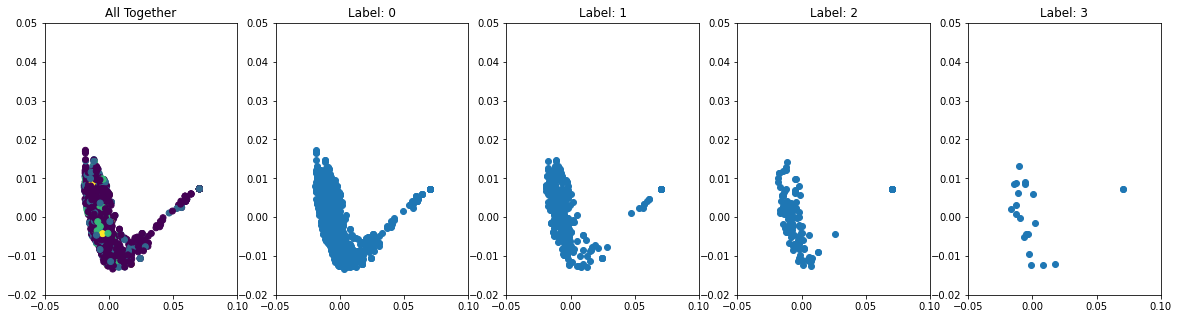

In [28]:
# visualize_by_label(data_matrix, predictions, [-0.03, 0.025, -0.02, 0.035])
visualize_by_label(data_matrix, predictions, [-0.05, 0.1, -0.02, 0.05])

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 2059 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


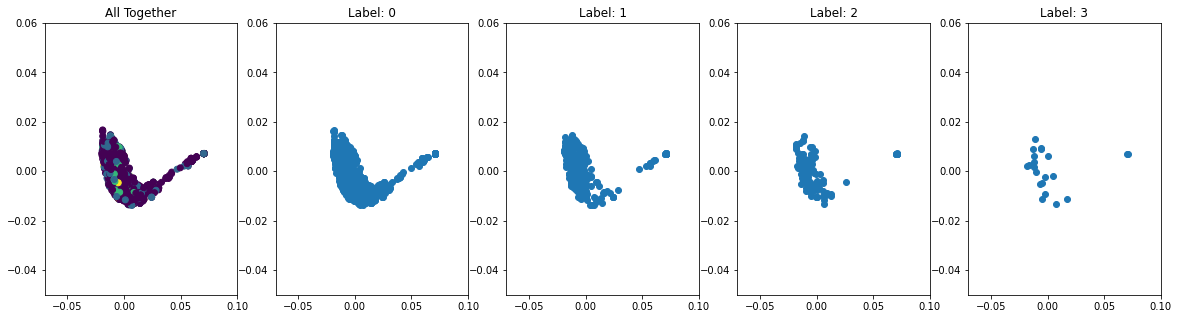

In [29]:
tmp = data_matrix - np.mean(data_matrix, axis=0)
visualize_by_label(tmp, predictions, [-0.07, 0.1, -0.05, 0.06])

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 2059 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Using SMACOF because SGD returned NaN


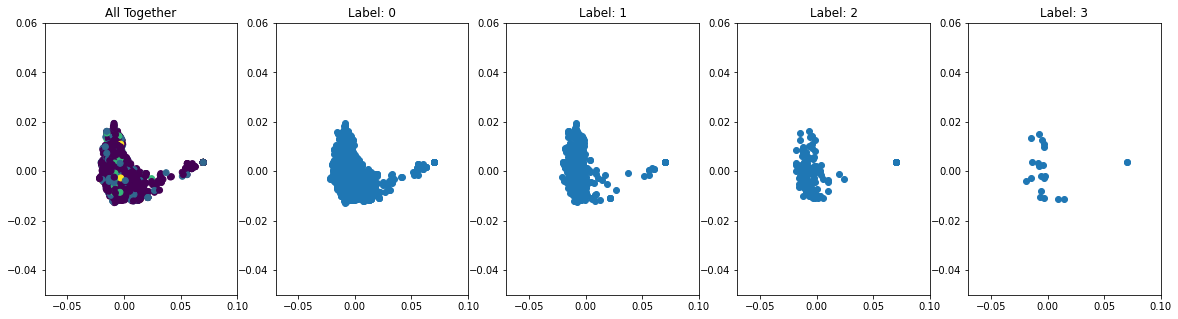

In [30]:
tmp = data_matrix - np.reshape(np.mean(data_matrix, axis=1), (data_matrix.shape[0], 1))
visualize_by_label(tmp, predictions, [-0.07, 0.1, -0.05, 0.06])

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 2059 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


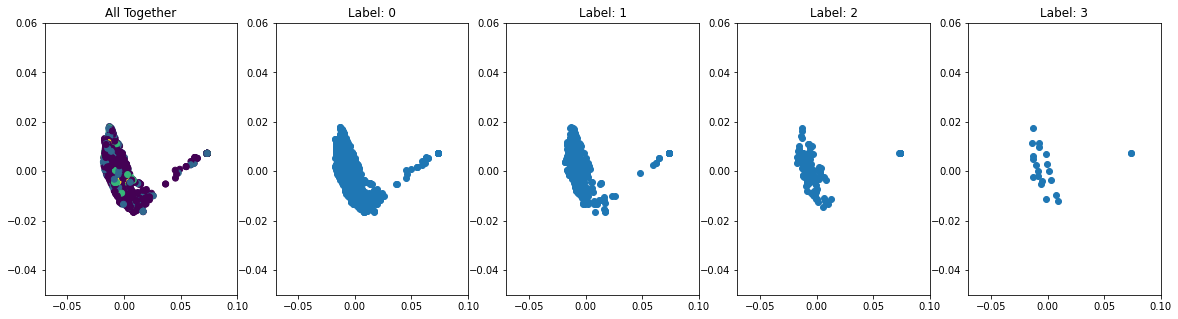

In [31]:
# tmp = data_matrix - np.reshape(np.mean(data_matrix, axis=1), (data_matrix.shape[0], 1))
# tmp = data_matrix / np.reshape(np.sum(data_matrix, axis=1), (data_matrix.shape[0],1))
tmp = scipy.stats.zscore(data_matrix)
visualize_by_label(tmp, predictions, [-0.07, 0.1, -0.05, 0.06])

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 2059 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Using SMACOF because SGD returned NaN


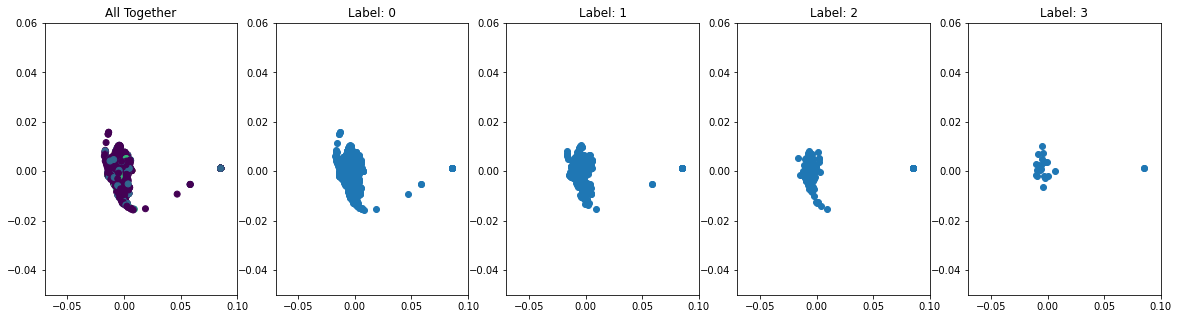

In [32]:
tmp = data_matrix ** 0.5
tmp = scipy.stats.zscore(tmp)
visualize_by_label(tmp, predictions, [-0.07, 0.1, -0.05, 0.06])

fixed bandwidth specified


/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:280: RuntimeWarning: Detected zero distance between samples 230 and 377. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/graphtools/graphs.py:280: RuntimeWarning: Detected zero distance between samples 230 and 377. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


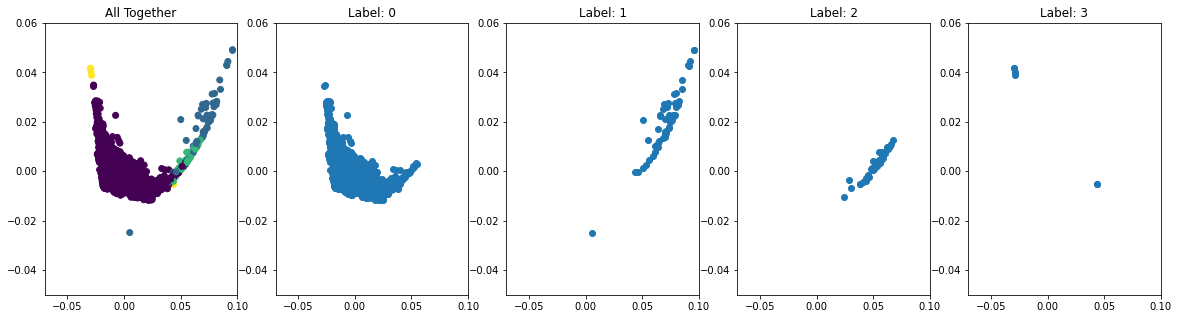

In [21]:
data_affin = cd.gaussian_kernel(tmp,sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)
data_phate = phate.PHATE(verbose=0).fit_transform(tmp)
visualize_by_label(tmp, labels_SC, [-0.07, 0.1, -0.05, 0.06])

In [ ]:
tmp = data_matrix ** 0.5
tmp = tmp - np.reshape(np.mean(tmp, axis=1), (tmp.shape[0], 1))
visualize_by_label(tmp, predictions, [-0.03, 0.2, -0.04, 0.05])

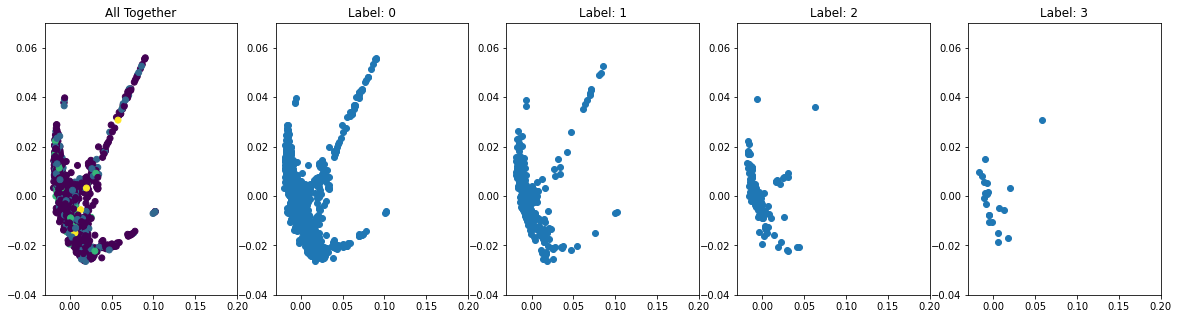

In [102]:
tmp = data_matrix ** 0.5
tmp = tmp - np.reshape(np.mean(tmp, axis=1), (tmp.shape[0], 1))
tmp = scipy.stats.zscore(tmp)
visualize_by_label(tmp, predictions, [-0.03, 0.2, -0.04, 0.07])

In [81]:
data_affin = cd.gaussian_kernel(tmp,kernel_type='adaptive',sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)
data_phate = phate.PHATE(verbose=0).fit_transform(tmp)

fixed bandwidth specified


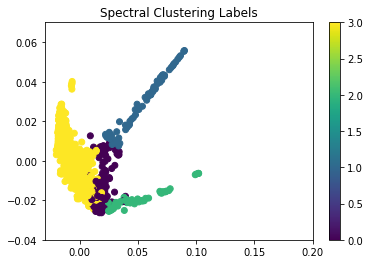

In [86]:
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.xlim(-0.03, 0.2)
plt.ylim(-0.04, 0.07)
plt.colorbar()

We can do fancy parameter adjustments later when we have more data.

an interesting look :o 

### PCA

In [13]:
data_matrix -= np.mean(data_matrix,axis=0)
U, S, Vt = np.linalg.svd(data_matrix)
components = Vt.T

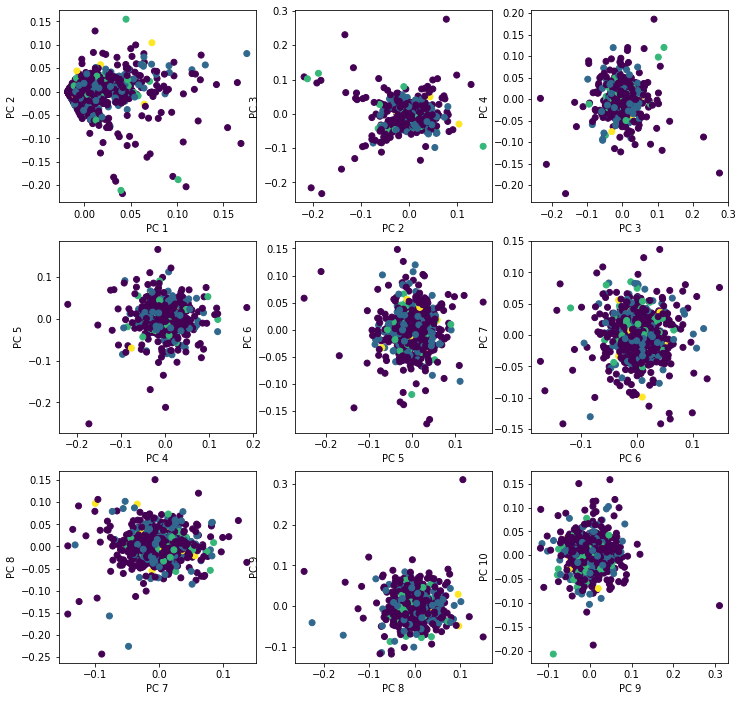

In [14]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(U[:,i],U[:,i+1],c=predictions)
    plt.xlabel('PC {}'.format(i+1)); plt.ylabel('PC {}'.format(i+2))
plt.show()

In [15]:
def get_top_PCs(components, chan_names, num_features=3, PC=1):
    components = np.abs(components[:,PC-1])
    top = np.flip(np.argsort(components)[-num_features:])
    labels = [chan_names[i] for i in top]
    return labels

In [16]:
print('PC 1 top channels:')
print(get_top_PCs(components, np.arange(1,10), PC=1)) # components are Vt.T (loadings)
print('PC 2 top channels:')
print(get_top_PCs(components, np.arange(1,10), PC=2))

PC 1 top channels:
[7, 1, 8]
PC 2 top channels:
[4, 5, 7]


None of these PCs look particularly amazing.. 

### KMeans

I guess 4 clusters: None, VS, MS, Both

In [173]:
from sklearn.cluster import KMeans
labels_kmeans = KMeans(n_clusters=4, n_init=5, max_iter=300).fit_predict(data_matrix)

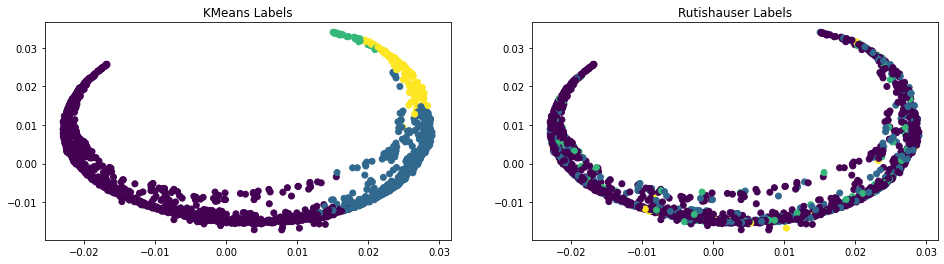

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_kmeans)
plt.title('KMeans Labels')
plt.subplot(122)
plt.scatter(data_phate[:,0],data_phate[:,1],c=predictions)
plt.title('Rutishauser Labels')
plt.show()

Hmm, well it would've been okay if there were more fewer "none" points ... maybe ....

### Spectral Clustering

In [219]:
import importlib
importlib.reload(cd)

<module 'clusterdata' from '/Users/Renee/Desktop/F20/CPSC453/FinalProject/neuron-clustering/clusterdata.py'>

In [ ]:
data_affin = cd.gaussian_kernel(data_matrix,sigma=3.0,k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC  = cd.SC(data_lapl, k=4)

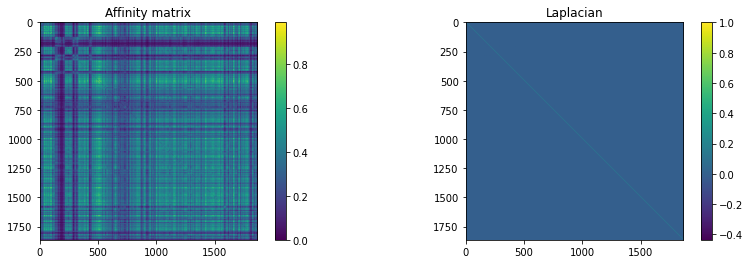

In [82]:
# visualize matrices
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(data_affin)
plt.title('Affinity matrix')
plt.colorbar()
plt.subplot(122)
plt.imshow(data_lapl)
plt.title('Laplacian')
plt.colorbar()
plt.show()

In [ ]:
# more visualize, i prolly should've done this better..
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_kmeans)
plt.title('KMeans Labels')
plt.subplot(132)
plt.scatter(data_phate[:,0],data_phate[:,1],c=labels_SC)
plt.title('Spectral Clustering Labels')
plt.subplot(133)
plt.scatter(data_phate[:,0],data_phate[:,1],c=predictions)
plt.title('Rutishauser Labels')
plt.show()

In [382]:
data_affin = cd.gaussian_kernel(tmp,kernel_type="adaptive", sigma=3.0, k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC, centroids  = cd.SC(data_lapl, k=3)
# labels_kmeans, centroids = cd.kmeans(tmp, k=3, thresh=0.4)
# labels_cmeans, centroids = cd.cmeans(tmp, k=3)
# data_phate = phate.PHATE(verbose=0).fit_transform(tmp)

adaptive bandwidth specified
early stopping!
early stopping!
early stopping!
early stopping!
early stopping!


In [383]:
centroids

array([[-0.68480597, -0.12489947, -0.37296314],
       [-0.97173536,  0.18451585,  0.08984424],
       [-0.39035933, -0.74505008, -0.01257663]])

In [384]:
labels_SC

array([[1.86718075e-03, 9.97500006e-01, 6.32813566e-04],
       [2.75601228e-03, 9.96302403e-01, 9.41584447e-04],
       [1.04655842e-03, 9.98602771e-01, 3.50670326e-04],
       ...,
       [1.34430525e-03, 9.98237996e-01, 4.17698677e-04],
       [2.79933175e-01, 6.74228986e-01, 4.58378385e-02],
       [7.04905936e-01, 2.37903961e-01, 5.71901029e-02]])

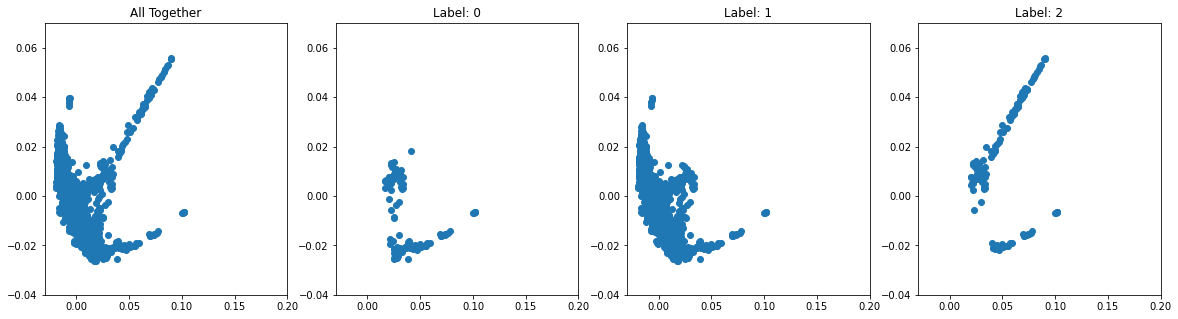

In [385]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for i in range(4):
    if i == 0:
        ax[0].scatter(data_phate[:,0],data_phate[:,1])
        ax[0].set_title('All Together')
    else:
        ind = [a for a in range(labels_SC.shape[0]) if labels_SC[a,i-1] > 0.1]
        ax[i].scatter(data_phate[ind,0], data_phate[ind,1])
        ax[i].set_title('Label: {}'.format(i-1))
    ax[i].set_xlim(-0.03, 0.2)
    ax[i].set_ylim(-0.04, 0.07)
plt.show()

In [53]:
_, psi = np.linalg.eigh(data_lapl)
psi_k = psi[:, :3]
# normalize your eigenvector rows
psi_k /= np.linalg.norm(psi_k, axis=1)[:,None]

used = set()
rand_pt = np.random.random_integers(0, psi_k.shape[0]-1)
pts = [pt for pt in range(psi_k.shape[0]) if pt not in used]
dists = np.array([np.linalg.norm(psi_k[pt,...] - psi_k[rand_pt,...]) for pt in pts])

<ipython-input-53-21cb7cb20fbd>:4: RuntimeWarning: divide by zero encountered in true_divide
  psi_k /= np.linalg.norm(psi_k, axis=1)[:,None]
<ipython-input-53-21cb7cb20fbd>:4: RuntimeWarning: invalid value encountered in true_divide
  psi_k /= np.linalg.norm(psi_k, axis=1)[:,None]
<ipython-input-53-21cb7cb20fbd>:7: DeprecationWarning: This function is deprecated. Please call randint(0, 1862 + 1) instead
  rand_pt = np.random.random_integers(0, psi_k.shape[0]-1)


## Toy dataset clustering

In [27]:
def gen_points(n=1000,k=2,dim=2,sigma=2,plot=1):
    ppc = int(n/k) #points per cluster
    coords = np.empty([n,dim])
    gt = np.zeros(n);
    for i in range(k):
        coords[i*ppc:(i+1)*ppc,:] = scipy.stats.norm(loc=3*i, scale=sigma).rvs(size=(ppc,dim))
        #coords[ppc:,:] = scipy.stats.norm(loc=3, scale=sigma).rvs(size=(ppc,dim))
        gt[i*ppc:(i+1)*ppc] = i;
    if plot:
        plt.figure(figsize=(6,4))
        plt.scatter(coords[:,0],coords[:,1],c=gt)
        plt.xlim(-6, 10)
        plt.ylim(-8,10)
        plt.show()
    return coords, gt

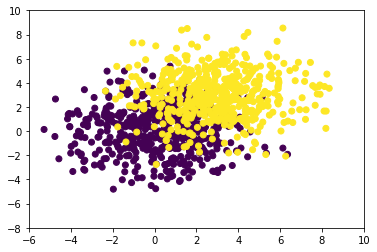

In [28]:
coords,gt = gen_points(k=2,dim=2,sigma=2)

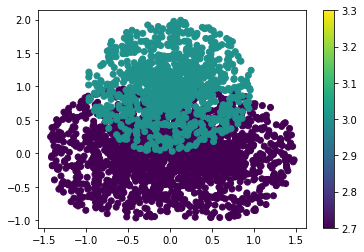

In [293]:
theta1 = np.linspace(0, 2*np.pi, 1000)
theta2 = np.linspace(0, 2*np.pi, 1000)
theta3 = np.linspace(0, 2*np.pi, 1000)
r1 = np.random.rand((1000))
x1, y1 = np.reshape(r1 * np.cos(theta1) - 0.5, (1000,1)), np.reshape(r1 * np.sin(theta1), (1000,1))
circle1 = np.concatenate((x1,y1), axis=1)
r2 = np.random.rand((1000))
x2, y2 = np.reshape(r2 * np.cos(theta2) + 0.5, (1000,1)), np.reshape(r2 * np.sin(theta2), (1000,1))
circle2 = np.concatenate((x2,y2), axis=1)
r3 = np.random.rand((1000))
x3, y3 = np.reshape(r3 * np.cos(theta3), (1000,1)), np.reshape(r3 * np.sin(theta2), (1000,1)) + 1
circle3 = np.concatenate((x3,y3), axis=1)
labels1, labels2, labels3 = np.full((1000,1),1), np.full((1000,1),2), np.full((1000,1),3)
coords = np.concatenate((circle1,circle2,circle3), axis=0)
labels = np.concatenate((labels1,labels2,labels3), axis=0)
plt.scatter(x1,y1,c=labels1)
plt.scatter(x2,y2,c=labels2)
plt.scatter(x3,y3,c=labels3)
plt.colorbar()
plt.show()

In [294]:
data_phate_orig = phate.PHATE(verbose=0).fit_transform(coords)

In [372]:
import importlib
importlib.reload(cd)

<module 'clusterdata' from '/mnt/c/Users/Annie/Documents/Yale/CPSC553/neuron-clustering/clusterdata.py'>

In [373]:
data_affin = cd.gaussian_kernel(coords,kernel_type="adaptive", sigma=3.0, k=5)
data_lapl  = cd.L(data_affin) # note: made adjustments to cd.L normalizing b/c 0's in affinity
labels_SC, centroids  = cd.SC(data_lapl, k=3)
# labels_kmeans, centroids = cd.kmeans(coords, k=2, thresh=0.45)
# labels_cmeans, centroids = cd.cmeans(coords, k=2)

adaptive bandwidth specified
early stopping!
early stopping!
early stopping!
early stopping!
early stopping!


In [374]:
centroids

array([[ 0.60120106, -0.32470909, -0.43722616],
       [ 0.60436028, -0.21626145,  0.49743798],
       [ 0.60260373,  0.54189852, -0.05425309]])

In [375]:
labels_SC

array([[0.18125346, 0.72913273, 0.08961381],
       [0.91318552, 0.04829647, 0.03851801],
       [0.51162218, 0.36907414, 0.11930368],
       ...,
       [0.07669349, 0.13604019, 0.78726632],
       [0.10343989, 0.24593614, 0.65062397],
       [0.07338895, 0.12588963, 0.80072142]])

In [305]:
def plot_cluster_results(data, k, orig_labels, gen_labels, limits, cmeans=False, thresh=0.4):
    x1,x2,y1,y2 = limits
    fig, ax = plt.subplots(1, k+1, figsize=(5*(k+1),5))
    for i in range(k+1):
        if i == 0:
            ax[0].scatter(data[:,0],data[:,1], c=orig_labels)
            ax[0].set_title('All Together')
        else:
            if cmeans:
                ind = [a for a in range(gen_labels.shape[0]) if gen_labels[a,i-1] > thresh]
            else:
                ind = [a for a in range(gen_labels.shape[0]) if gen_labels[a,i-1]]
            ax[i].scatter(data[ind,0], data[ind,1])
            ax[i].set_title('Label: {}'.format(i-1))
        ax[i].set_xlim(x1,x2)
        ax[i].set_ylim(y1,y2)
    plt.show()

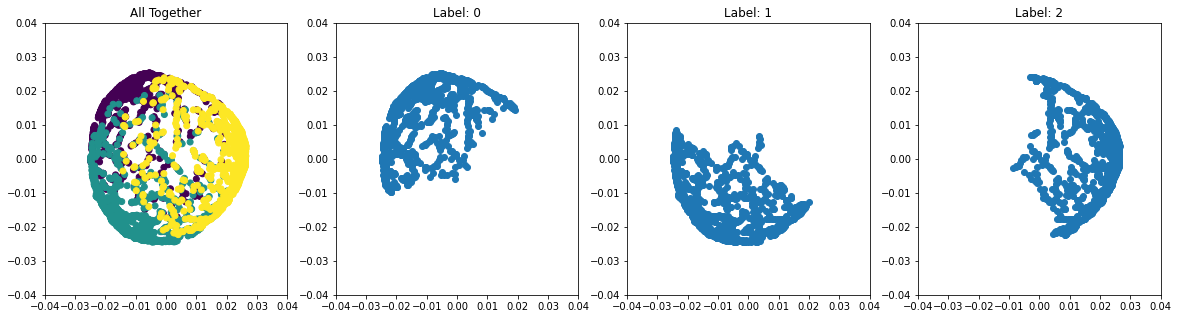

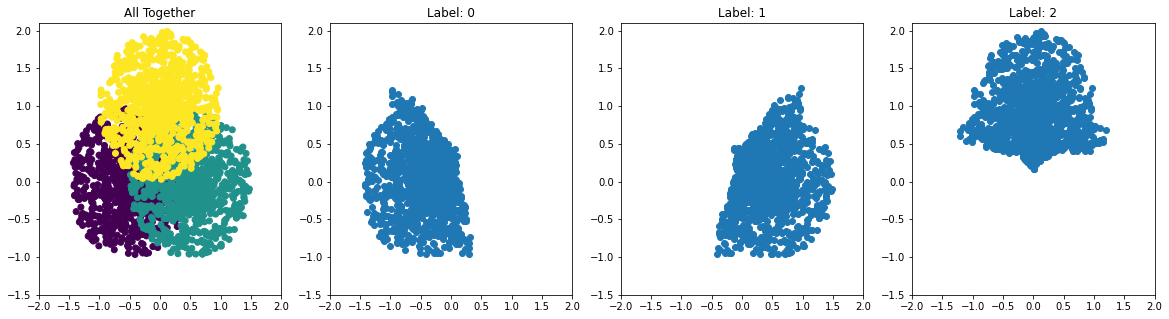

In [381]:
plot_cluster_results(data_phate_orig, 3, labels, labels_SC, [-0.04, 0.04, -0.04, 0.04], cmeans=True, thresh=0.15)
plot_cluster_results(coords, 3, labels, labels_SC,  [-2,2,-1.5,2.1], cmeans=True, thresh=0.15)

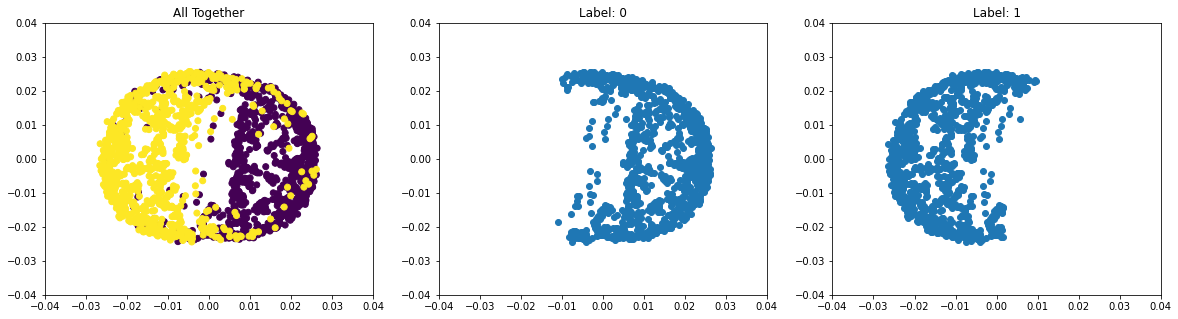

In [268]:
plot_cluster_results(data_phate_orig, 2, labels, labels_SC, [-0.04, 0.04, -0.04, 0.04], cmeans=True, thresh=0.1)

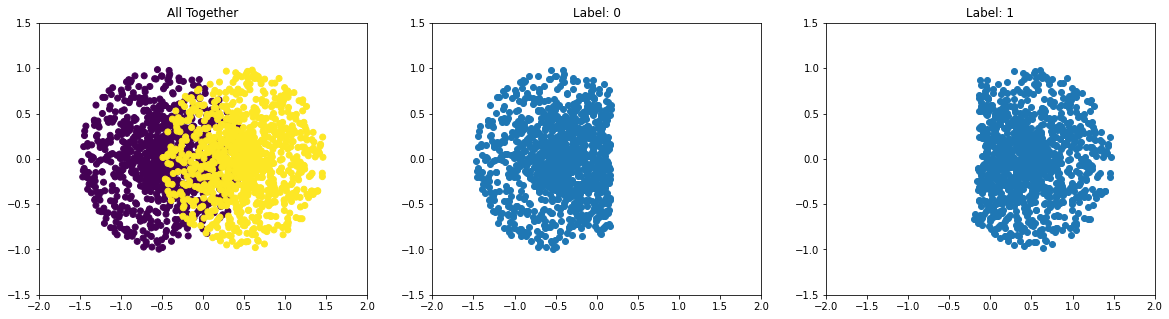

In [267]:
plot_cluster_results(coords, 2, labels, labels_SC,  [-2,2,-1.5,1.5], cmeans=True, thresh=0.1)

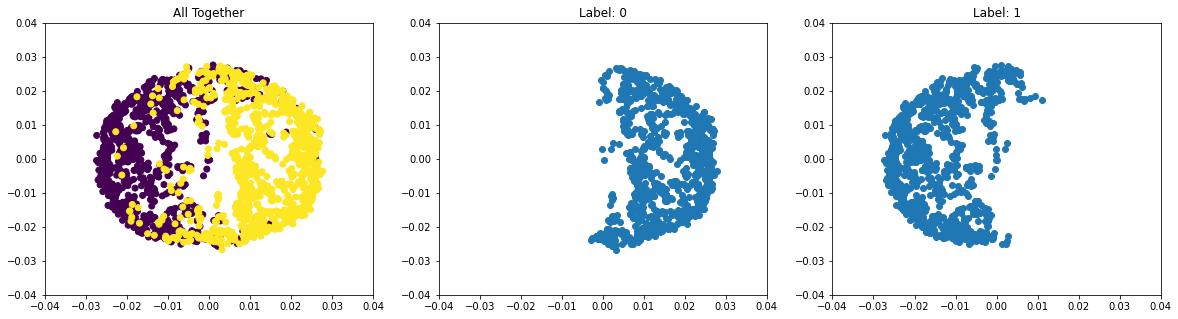

In [97]:
plot_cluster_results(data_phate_orig, 2, labels, labels_SC, [-0.04, 0.04, -0.04, 0.04])

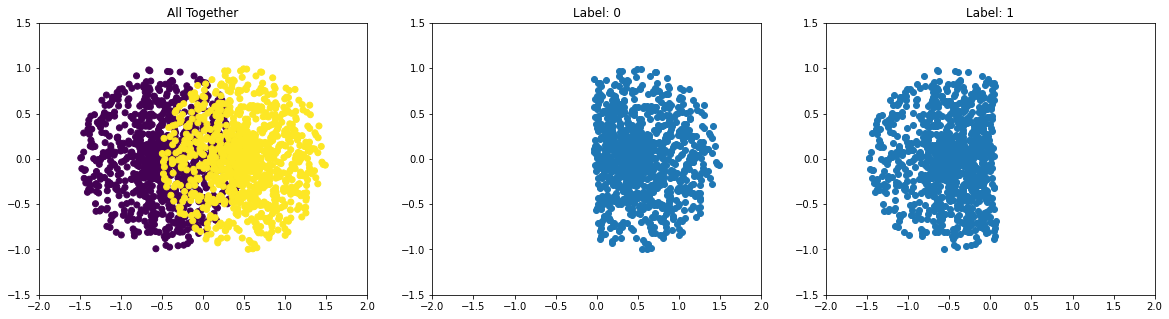

In [98]:
plot_cluster_results(coords, 2, labels, labels_SC,  [-2,2,-1.5,1.5])

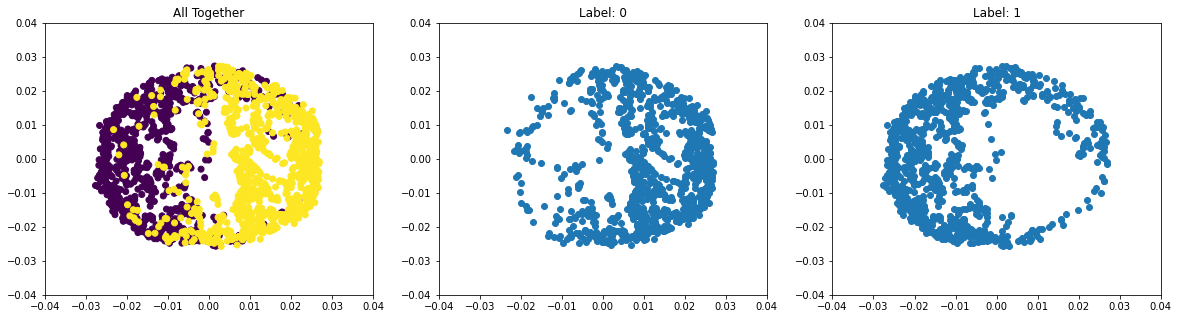

In [91]:
plot_cluster_results(data_phate_orig, 2, labels, labels_kmeans, [-0.04, 0.04, -0.04, 0.04])

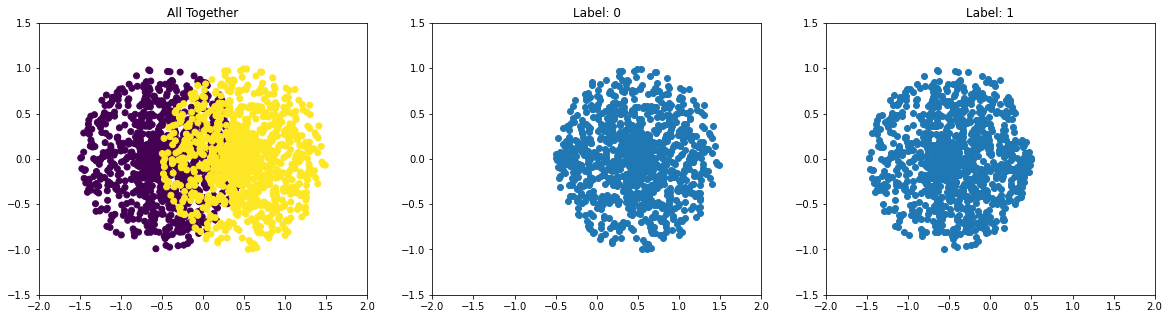

In [92]:
plot_cluster_results(coords, 2, labels, labels_kmeans, [-2,2,-1.5,1.5])

### c-means

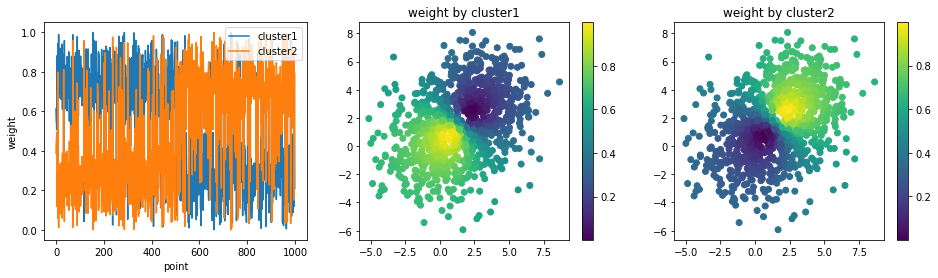

In [9]:
# ran on my venn diagrams
weights,centroids = cd.cmeans(coords,k=2)
plt.figure(figsize=(16,4))
plt.subplot(131);plt.plot(weights[:,0]);plt.plot(weights[:,1]); plt.ylabel('weight');plt.xlabel('point');plt.legend(['cluster1','cluster2'])
plt.subplot(132); plt.scatter(coords[:,0],coords[:,1],c=weights[:,0]);plt.title('weight by cluster1'); plt.colorbar()
plt.subplot(133); plt.scatter(coords[:,0],coords[:,1],c=weights[:,1]); plt.title('weight by cluster2'); plt.colorbar()
plt.show()

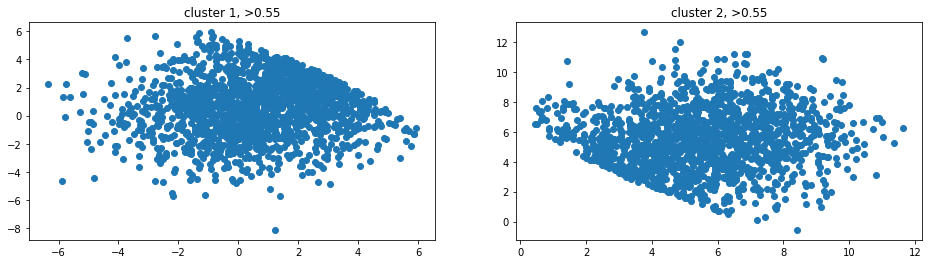

In [25]:
# plot clusters separately
plt.figure(figsize=(16,4))
plt.subplot(121); plt.title('cluster 1, >0.60'); #plt.xlim([-1.5,1.5])
plt.scatter(coords[weights[:,0]>0.55,0],coords[weights[:,0]>0.55,1])
plt.subplot(122); plt.title('cluster 2, >0.60'); #plt.xlim([-1.5,1.5])
plt.scatter(coords[weights[:,1]>0.55,0],coords[weights[:,1]>0.55,1])
plt.show()

#### Trying 3 centroids

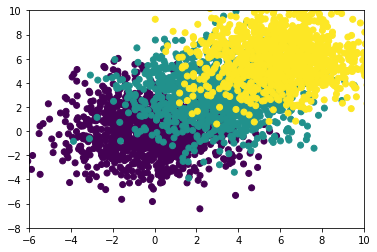

In [31]:
coords,gt = gen_points(n=3333,k=3,dim=2,sigma=2)

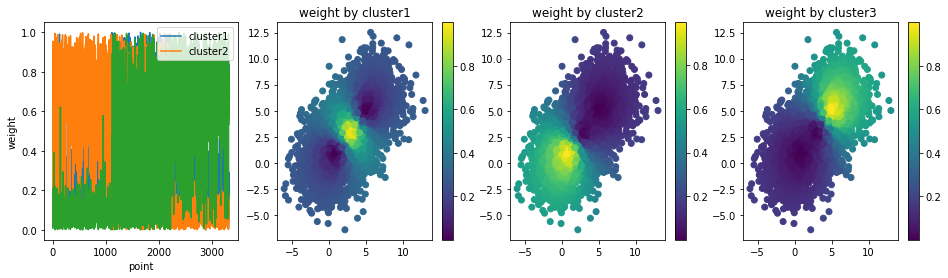

In [48]:
weights,centroids = cd.cmeans(coords,k=3)
plt.figure(figsize=(16,4))
plt.subplot(141);plt.plot(weights[:,0]);plt.plot(weights[:,1]); plt.plot(weights[:,2])
plt.ylabel('weight');plt.xlabel('point');plt.legend(['cluster1','cluster2'])
plt.subplot(142); plt.scatter(coords[:,0],coords[:,1],c=weights[:,0]);plt.title('weight by cluster1'); plt.colorbar()
plt.subplot(143); plt.scatter(coords[:,0],coords[:,1],c=weights[:,1]); plt.title('weight by cluster2'); plt.colorbar()
plt.subplot(144); plt.scatter(coords[:,0],coords[:,1],c=weights[:,2]); plt.title('weight by cluster3'); plt.colorbar()
plt.show()

In [49]:
tmp = data_matrix ** 0.5
tmp = tmp - np.reshape(np.mean(tmp, axis=1), (tmp.shape[0], 1))
tmp = scipy.stats.zscore(tmp)

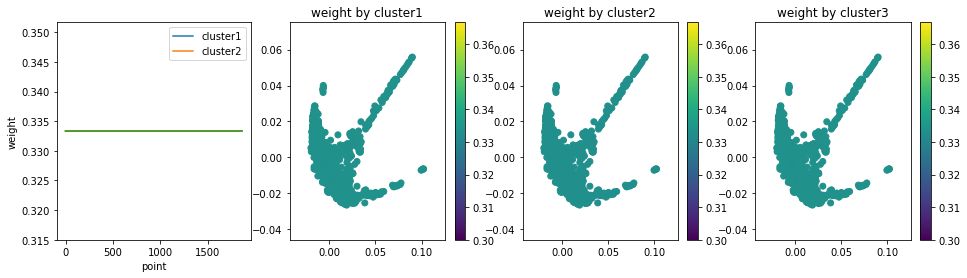

In [50]:
weights,centroids = cd.cmeans(tmp,k=3)
data_phate = phate.PHATE(verbose=0).fit_transform(tmp)
plt.figure(figsize=(16,4))
plt.subplot(141);plt.plot(weights[:,0]);plt.plot(weights[:,1]); plt.plot(weights[:,2])
plt.ylabel('weight');plt.xlabel('point');plt.legend(['cluster1','cluster2'])
plt.subplot(142); plt.scatter(data_phate[:,0],data_phate[:,1],c=weights[:,0]);plt.title('weight by cluster1'); plt.colorbar()
plt.subplot(143); plt.scatter(data_phate[:,0],data_phate[:,1],c=weights[:,1]); plt.title('weight by cluster2'); plt.colorbar()
plt.subplot(144); plt.scatter(data_phate[:,0],data_phate[:,1],c=weights[:,2]); plt.title('weight by cluster3'); plt.colorbar()
plt.show()

# Random Exploration
Feel free to ignore or to further play with the data here.

In [20]:
# import RutishauserLabtoNWB as RLab

dataDirectory = 'NWBData'
list_of_patients_behavior = [5, 6]  # List of sessions to summarize behavior. Set to [] to skip
list_of_patients_neurons = [132]    # List of sessions to analyze neural data for. Set to [] to skip

# RLab.NO2NWB_analysis(NWBFilePath,list_of_patients_behavior, list_of_patients_neurons)

Session_id:  CS58_132
Channel:  146
Cell_id:  0
Number of spikes: 1037
Session_id:  CS58_132
Channel:  148
Cell_id:  1
Number of spikes: 1365
Session_id:  CS58_132
Channel:  149
Cell_id:  2
Number of spikes: 2324
Session_id:  CS58_132
Channel:  150
Cell_id:  3
Number of spikes: 3589
Session_id:  CS58_132
Channel:  177
Cell_id:  4
Number of spikes: 722
Session_id:  CS58_132
Channel:  181
Cell_id:  5
Number of spikes: 5699
Session_id:  CS58_132
Channel:  182
Cell_id:  6
Number of spikes: 937
Session_id:  CS58_132
Channel:  183
Cell_id:  7
Number of spikes: 749
Processing..:  CS58_132  146   614
Processing..:  CS58_132  148   776
Processing..:  CS58_132  149   821
Processing..:  CS58_132  150   1093
Processing..:  CS58_132  177   551
Processing..:  CS58_132  181   1422
Processing..:  CS58_132  182   527
Processing..:  CS58_132  183   529
There are 5 VS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb
There are 0 MS cell(s) in this session(132): NWBData/P58CS_NOID132.nwb


/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


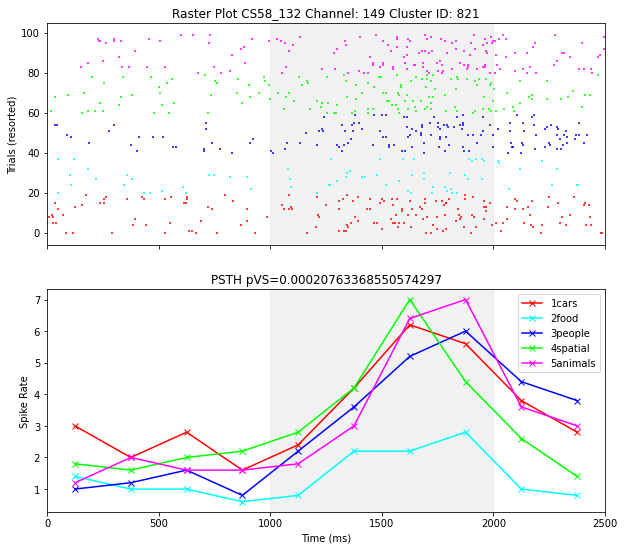

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


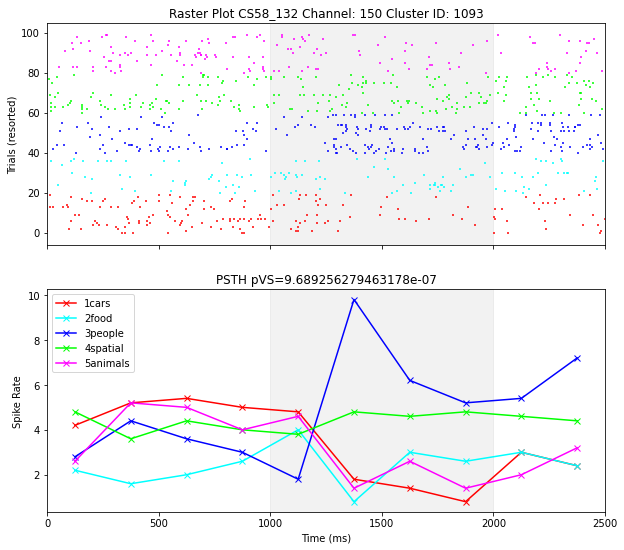

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


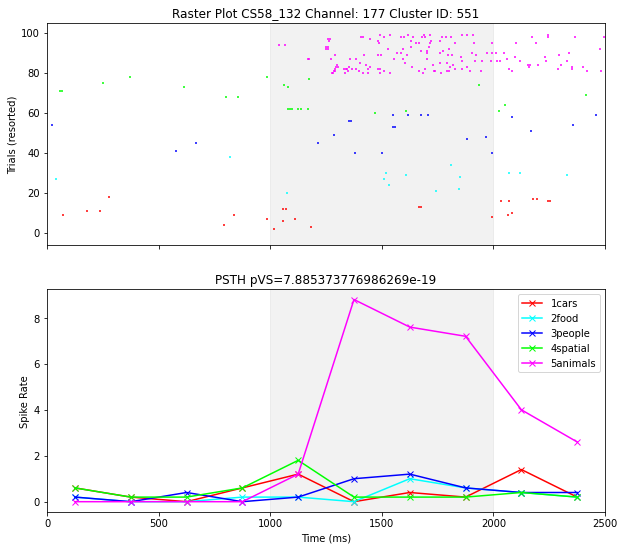

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


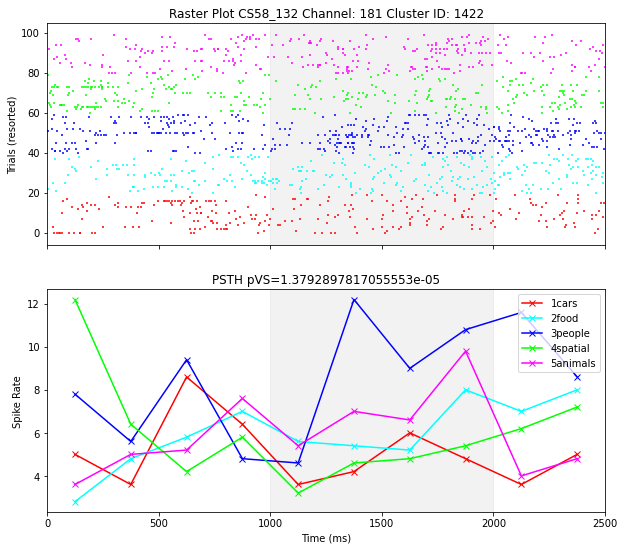

/mnt/c/Users/Annie/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


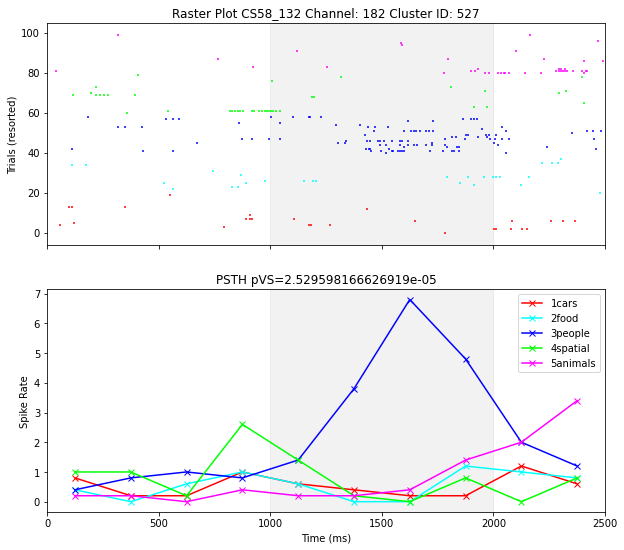

In [25]:
for session in list_of_patients_neurons:
        session_file = helper.getpatientfile_fromINIfile(session, dataDirectory) # Session file = .nwb file

        neurons = []
        # Get neurons from nwbfile
        try:
            nwbfile = helper.read(session_file)
        except ValueError as e:
            print('Problem opening the file: ' + str(e))
            # logging.warning('Error opening file: ' + session_file)
            continue
        try:
            temp = single_neuron.extract_neuron_data_from_nwb(nwbfile)
        except IndexError as e:
            print("Somehow catch this index error: " + str(e))
            continue
        neurons = neurons + temp

        # Find visually selective (VS) neurons and memory selective (MS) neurons
        vs_neurons = []
        ms_neurons = []

        for neuron in neurons:
            print('Processing..: ', str(neuron.session_id) + ' ', str(neuron.channel_id),' ', str(neuron.neuron_id))
            if neuron.vs_test() < 0.05:
                vs_neurons.append(neuron)
            if neuron.ms_test(1000) < 0.05:
                ms_neurons.append(neuron)

        # Get some Data about VS & MS cells
        print('There are {} VS cell(s) in this session({}): {}'.format(len(vs_neurons), session ,session_file))
        print('There are {} MS cell(s) in this session({}): {}'.format(len(ms_neurons), session ,session_file))


        # Plot the raster/psth for ALL VS neurons and MS neurons in the identified session
        for i in range(0, len(vs_neurons)):
            vs_neurons[i].raster_psth(cell_type='visual')

        for i in range(0, len(ms_neurons)):
            ms_neurons[i].raster_psth(cell_type='memory')

In [3]:
file = NWBHDF5IO('NWBData/P9HMH_NOID5.nwb', mode='r').read()

In [12]:
def get_event_data(nwbfile):
    """
    Get event data from the nwbfile
    """
    events = nwbfile.get_acquisition('events')
    experiment_id_list = np.asarray(nwbfile.get_acquisition('experiment_ids').data)
    events_data = np.asarray(events.data)
    events_timestamps = np.asarray(events.timestamps)

    experiment_description = nwbfile.data_collection

    experiment_ids = re.findall(r'\d+', experiment_description)
    experiment_id_learn = int(experiment_ids[0])
    experiment_id_recog = int(experiment_ids[1])

    ind_learn = np.where(experiment_id_list == experiment_id_learn)
    ind_recog = np.where(experiment_id_list == experiment_id_recog)

    events_learn = events_data[ind_learn].astype(float)
    timestamps_learn = events_timestamps[ind_learn]

    events_recog = events_data[ind_recog].astype(float)
    timestamps_recog = events_timestamps[ind_recog]

    return events_learn, timestamps_learn, events_recog, timestamps_recog

In [17]:
events_learn, timestamps_learn, events_recog, timestamps_recog = get_event_data(file)